In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading, cleaning, wrangling data for all stars + batters 
all_star_df = pd.read_csv("AllstarFull.csv")
batting_df = pd.read_csv("Batting.csv")
players_df = pd.read_csv("People.csv")
stats_df = pd.read_csv("jeffbagwell_war_historical_2023.csv", encoding='latin-1')
all_star_df = all_star_df[all_star_df['yearID'] >= 2018]
batting_df = batting_df[((batting_df['yearID'] >= 2018)&(batting_df['stint']==1))]
stats_df = stats_df[((stats_df['year_ID']>=2012)&(stats_df['stint_ID']==1))]
batting_df['PA'] = batting_df['AB'] + batting_df['BB'] + batting_df['HBP'] + batting_df['SF'] + batting_df['SH']
batting_df['AVG'] = batting_df['H'] / batting_df['AB']
batting_df['OBP'] = (batting_df['H'] + batting_df['BB'] + batting_df['HBP']) / (batting_df['AB'] + batting_df['BB'] + batting_df['HBP'] + batting_df['SF'])
batting_columns = ['playerID', 'yearID','stint', 'teamID','PA','AB', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'OBP']
all_star_columns= ['playerID', 'yearID', 'teamID', 'GP']
players_column = ['nameFirst', 'nameLast','playerID']
batting_df = batting_df[batting_columns]
all_star_df = all_star_df[all_star_columns]
players_df = players_df[players_column]
batting_df
stats_df[stats_df['key_bbref']=='abreubo01']
stats_df['OPS'] = stats_df['OBP_plus']+stats_df['SLG_plus']
print(stats_df['player_name'])

6         David Aardsma
7         David Aardsma
8         David Aardsma
57        Fernando Abad
58        Fernando Abad
              ...      
112614      Mike Zunino
112615      Mike Zunino
112647        Tony Zych
112648        Tony Zych
112649        Tony Zych
Name: player_name, Length: 15048, dtype: object


In [3]:
all_star_batters = pd.merge(batting_df, all_star_df, left_on=['playerID', 'yearID'], right_on=['playerID','yearID'], how='left')
print(all_star_batters)
all_star_batters = pd.merge(all_star_batters, players_df, on='playerID', how='left')
print(all_star_batters)
all_star_batters = all_star_batters.rename(columns={"teamID_x":'teamID'})
all_star_batters = all_star_batters.drop('teamID_y',axis=1)
print(all_star_batters)
all_star_batters = pd.merge(all_star_batters, stats_df,  how='right', left_on=['playerID','yearID','teamID'], right_on = ['key_bbref','year_ID','team_ID']).drop_duplicates()
print(all_star_batters)
all_star_batters = all_star_batters[all_star_batters['year_ID']!=2020]
print(all_star_batters[all_star_batters['playerID']=='sotoju01'])



       playerID  yearID  stint teamID_x     PA   AB    H  2B  3B  HR   RBI  \
0     abreujo02    2018      1      CHA  553.0  499  132  36   1  22  78.0   
1     acunaro01    2018      1      ATL  487.0  433  127  26   4  26  64.0   
2     adamewi01    2018      1      TBA  323.0  288   80   7   0  10  34.0   
3      adamja01    2018      1      KCA    0.0    0    0   0   0   0   0.0   
4     adamsau02    2018      1      WAS    0.0    0    0   0   0   0   0.0   
...         ...     ...    ...      ...    ...  ...  ...  ..  ..  ..   ...   
7077  zerpaan01    2022      1      KCA    0.0    0    0   0   0   0   0.0   
7078  zeuchtj01    2022      1      CIN    0.0    0    0   0   0   0   0.0   
7079  zimmebr01    2022      1      TOR   87.0   76    8   4   0   2   3.0   
7080  zimmebr02    2022      1      BAL    0.0    0    0   0   0   0   0.0   
7081  zuninmi01    2022      1      TBA  123.0  115   17   3   0   5  16.0   

      BB     SO       AVG       OBP teamID_y   GP  
0     37  1

In [4]:
all_star_batters['AS_selection'] = all_star_batters['GP'].replace(0,1)
print(all_star_batters['AS_selection'])
all_star_batters['AS_selection'] = all_star_batters['AS_selection'].fillna(0)
print(all_star_batters['AS_selection'])
all_star_batters['AS_selection'] = all_star_batters['AS_selection'].replace(0,False)
print(all_star_batters['AS_selection'])
all_star_batters['AS_selection'] = all_star_batters['AS_selection'].replace(1,True)
print(all_star_batters['AS_selection'])
all_star_batters[((all_star_batters['yearID']==2022)&(all_star_batters['AS_selection']==True))]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15044    1.0
15045    NaN
15046    NaN
15047    NaN
15048    NaN
Name: AS_selection, Length: 13759, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15044    1.0
15045    0.0
15046    0.0
15047    0.0
15048    0.0
Name: AS_selection, Length: 13759, dtype: float64
0        False
1        False
2        False
3        False
4        False
         ...  
15044        1
15045    False
15046    False
15047    False
15048    False
Name: AS_selection, Length: 13759, dtype: object
0        False
1        False
2        False
3        False
4        False
         ...  
15044     True
15045    False
15046    False
15047    False
15048    False
Name: AS_selection, Length: 13759, dtype: bool


,playerID,yearID,stint,teamID,PA,AB,H,2B,3B,HR,...,gms_DH,gms_PH,gms_PR,prev_tm,arrived,departed,next_tm,salary,OPS,AS_selection
54,acunaro01,2022.0,1.0,ATL,533.0,467.0,124.0,24.0,0.0,15.0,...,27.0,4.0,0.0,---,2018,2022,---,15000000.0,216.0,True
207,alcansa01,2022.0,1.0,MIA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,SLN,2018,2022,---,3800000.0,NaN,True
303,alonspe01,2022.0,1.0,NYN,685.0,597.0,162.0,27.0,0.0,40.0,...,27.0,0.0,0.0,---,2019,2022,---,7400000.0,242.0,True
334,altuvjo01,2022.0,1.0,HOU,604.0,527.0,158.0,39.0,0.0,28.0,...,2.0,4.0,0.0,---,2011,2022,---,29000000.0,261.0,True
379,alvaryo01,2022.0,1.0,HOU,561.0,470.0,144.0,29.0,2.0,37.0,...,77.0,2.0,0.0,---,2019,2022,---,764600.0,287.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13784,tuckeky01,2022.0,1.0,HOU,606.0,544.0,140.0,28.0,1.0,30.0,...,3.0,2.0,0.0,---,2018,2022,---,NaN,229.0,True
13835,turnetr01,2022.0,1.0,LAN,706.0,652.0,194.0,39.0,4.0,21.0,...,0.0,0.0,0.0,WAS,2021,2022,---,21000000.0,226.0,True
13946,valdefr01,2022.0,1.0,HOU,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,---,2018,2022,---,3000000.0,NaN,True
14103,verlaju01,2022.0,1.0,HOU,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,DET,2017,2022,---,25000000.0,NaN,True


In [5]:
 all_star_batters['AS_selection'].value_counts(dropna = False)

False    13458
True       301
Name: AS_selection, dtype: int64

0        David Aardsma
1        David Aardsma
2        David Aardsma
3        Fernando Abad
4        Fernando Abad
             ...      
15044      Mike Zunino
15045      Mike Zunino
15046        Tony Zych
15047        Tony Zych
15048        Tony Zych
Name: player_name, Length: 13759, dtype: object


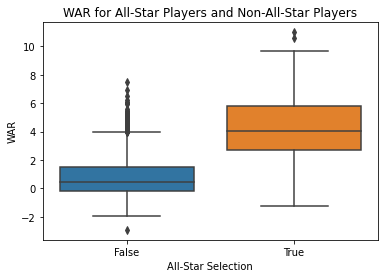

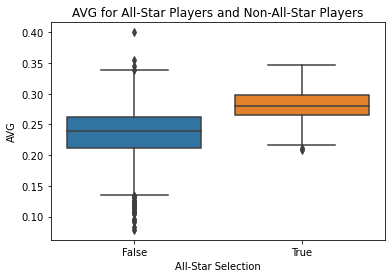

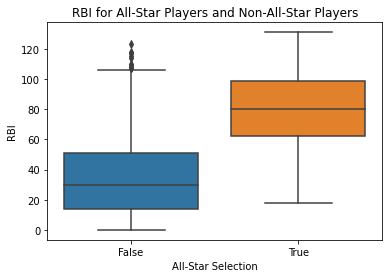

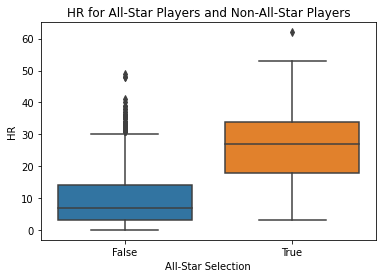

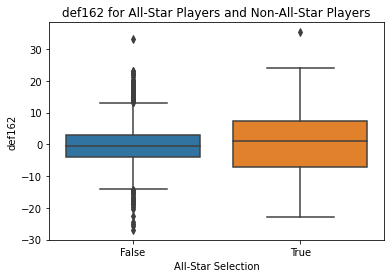

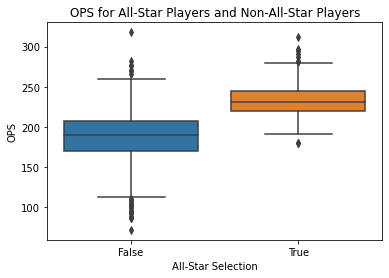

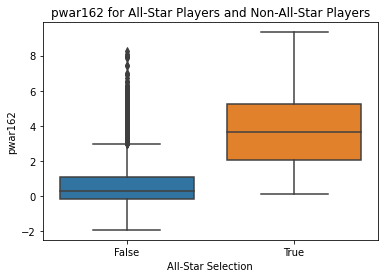

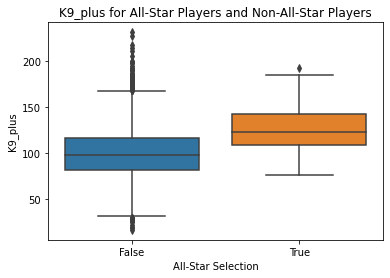

Series([], Name: player_name, dtype: object)


In [6]:
print(all_star_batters['player_name'])
all_star_pitchers = all_star_batters[all_star_batters['is_P']=='Y']
all_star_batters = all_star_batters[all_star_batters['is_P']=='N']
all_star_batters_min = all_star_batters[((all_star_batters['PA']>50)|(all_star_batters['AS_selection']==1)|((all_star_batters['is_P']=='Y')&(all_star_batters['innings']>=10)))]
all_star_batters_min = all_star_batters_min.drop('GP',axis=1)
all_star_pitchers_min = all_star_pitchers[((all_star_pitchers['PA']>50)|(all_star_pitchers['AS_selection']==1)|((all_star_pitchers['is_P']=='Y')&(all_star_pitchers['innings']>=10)))]
all_star_pitchers_min = all_star_pitchers_min.drop('GP',axis=1)
sns.boxplot(x='AS_selection', y='bwar162', data=all_star_batters_min)
plt.title('WAR for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('WAR')
plt.show()
sns.boxplot(x='AS_selection', y='AVG', data=all_star_batters_min)
plt.title('AVG for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('AVG')
plt.show()
sns.boxplot(x='AS_selection', y='RBI', data=all_star_batters_min)
plt.title('RBI for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('RBI')
plt.show()
sns.boxplot(x='AS_selection', y='HR', data=all_star_batters_min)
plt.title('HR for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('HR')
plt.show()
sns.boxplot(x='AS_selection', y='def162', data=all_star_batters_min)
plt.title('def162 for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('def162')
plt.show()
sns.boxplot(x='AS_selection', y='OPS', data=all_star_batters_min)
plt.title('OPS for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('OPS')
plt.show()
sns.boxplot(x='AS_selection', y='pwar162', data= all_star_pitchers_min)
plt.title('pwar162 for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('pwar162')
plt.show()
sns.boxplot(x='AS_selection', y='K9_plus', data= all_star_pitchers_min)
plt.title('K9_plus for All-Star Players and Non-All-Star Players')
plt.xlabel('All-Star Selection')
plt.ylabel('K9_plus')
plt.show()
print(all_star_batters_min[((all_star_batters_min['PA']<75)&(all_star_batters_min['AS_selection']==True))]['player_name'])

## Relationship between Plate Appearances and All-Star Selection
Median - higher. 
Distribution - higher  (provide explanation + analyze) 


In [7]:
#Most all star selections since 2012

all_star_counts = all_star_batters.groupby(['playerID','nameFirst', 'nameLast'])['AS_selection'].sum().reset_index()
most_as = all_star_counts.sort_values(by = 'AS_selection', ascending = False)
most_as.head(20)

,playerID,nameFirst,nameLast,AS_selection
89,bettsmo01,Mookie,Betts,4
593,martijd02,J. D.,Martinez,4
318,freemfr01,Freddie,Freeman,4
991,troutmi01,Mike,Trout,4
44,arenano01,Nolan,Arenado,4
570,machama01,Manny,Machado,3
492,judgeaa01,Aaron,Judge,3
794,realmjt01,J. T.,Realmuto,3
28,altuvjo01,Jose,Altuve,3
786,ramirjo01,Jose,Ramirez,3


In [8]:
#all stars PA (ignore the pitchers -- outliers)
top_players = most_as.nlargest(20, 'AS_selection')
top_players = pd.merge(top_players, batting_df[['playerID', 'PA']], on='playerID')
#top_players = top_players.groupby('playerID', as_index = False)['PA'].sum()
top_players = top_players.sort_values(by = 'PA', ascending = False)
top_players

,playerID,nameFirst,nameLast,AS_selection,PA
66,acunaro01,Ronald,Acuna,3,712.0
14,freemfr01,Freddie,Freeman,4,708.0
10,freemfr01,Freddie,Freeman,4,707.0
1,bettsmo01,Mookie,Betts,4,706.0
51,bogaexa01,Xander,Bogaerts,3,698.0
...,...,...,...,...,...
82,ohtansh01,Shohei,Ohtani,2,175.0
86,perezsa02,Salvador,Perez,2,156.0
94,molinya01,Yadier,Molina,2,156.0
18,troutmi01,Mike,Trout,4,146.0


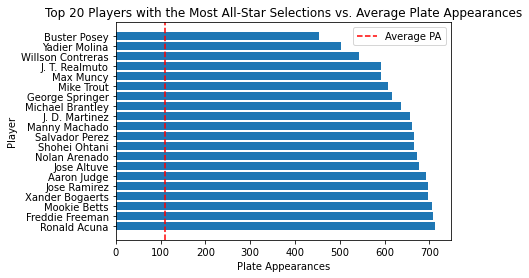

In [9]:
avg_pa = batting_df['PA'].mean()
# Create a horizontal bar chart comparing the top 20 players' PAs against the average PA
plt.barh(top_players['nameFirst'] + ' ' + top_players['nameLast'], top_players['PA'])
plt.axvline(x=avg_pa, color='red', linestyle='--')
plt.xlabel('Plate Appearances')
plt.ylabel('Player')
plt.title('Top 20 Players with the Most All-Star Selections vs. Average Plate Appearances')
plt.legend(['Average PA'])
plt.show()

In [10]:
# all_star_counts['AS_selection'] = all_star_counts['AS_selection'].astype(int)
# plt.hist(all_star_counts['AS_selection'], bins=range(0, max(all_star_counts['AS_selection'])+2, 1))
# plt.title('Distribution of All-Star Selections')
# plt.xlabel('Number of All-Star Selections')
# plt.ylabel('Count')
# plt.show()

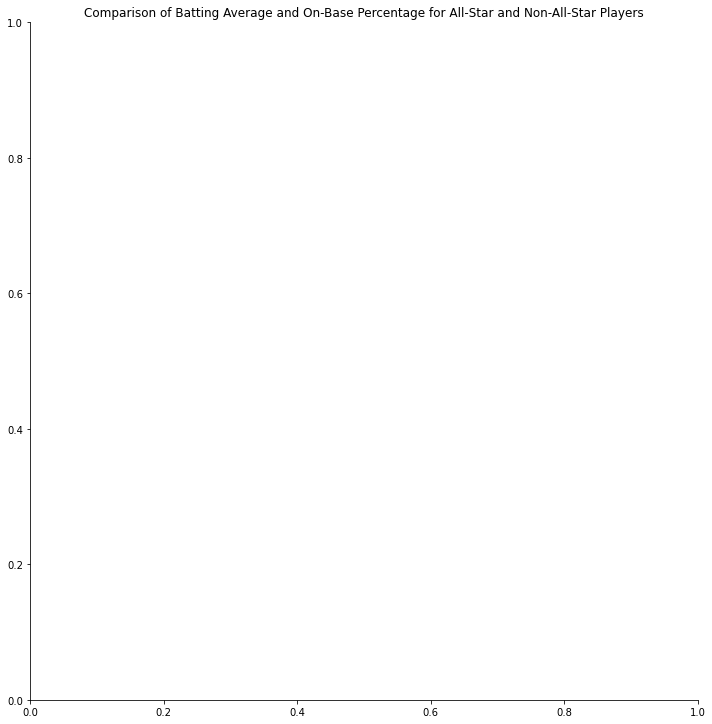

       playerID  yearID  stint teamID     PA     AB      H    2B   3B    HR  \
9867  ohtansh01  2022.0    1.0    LAA  666.0  586.0  160.0  30.0  6.0  34.0   

      ...  gms_DH  gms_PH  gms_PR  prev_tm  arrived departed next_tm  \
9867  ...   153.0     4.0     0.0      ---     2018     2022     ---   

         salary    OPS AS_selection  
9867  5500000.0  247.0         True  

[1 rows x 97 columns]


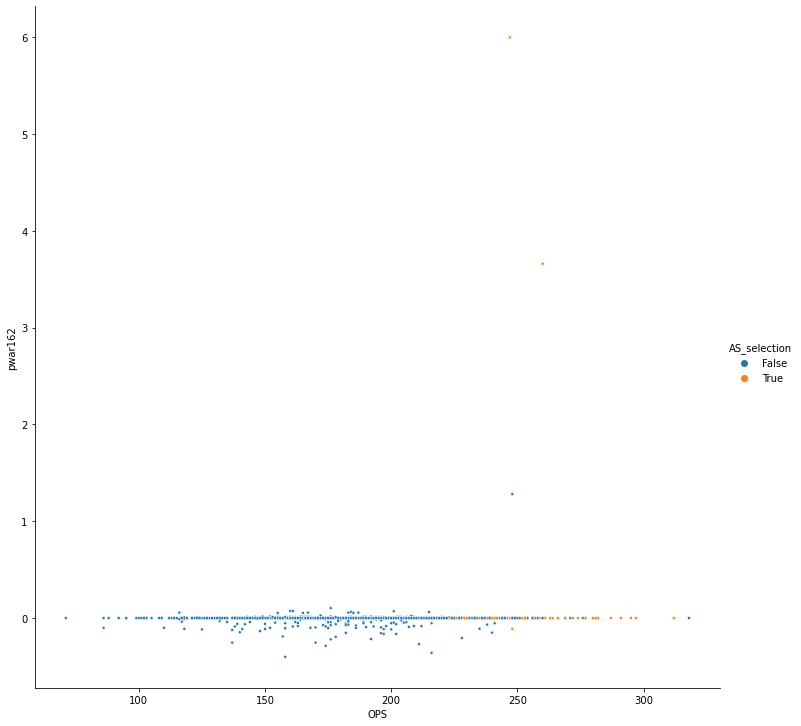

In [11]:
#AVG AND OBP against All stars and non all stars -- visualize here. 
sns.relplot(x='OPS', y='bwar162', hue='AS_selection', data=all_star_batters_min[all_star_batters_min['is_P']=='Y'],marker = '.',height=10)
plt.title('Comparison of Batting Average and On-Base Percentage for All-Star and Non-All-Star Players')
plt.show()
sns.relplot(x='OPS', y='pwar162', hue='AS_selection', data=all_star_batters_min,marker = '.',height=10)
print(all_star_batters_min[all_star_batters_min['pwar162'] == max(all_star_batters_min['pwar162'])])

In [12]:
try:
    import sklearn
    print(sklearn.__version__)
    if (sklearn.__version__ != '1.2.1' and sklearn.__version__ != '1.2.2'): #update for latest otter version
        !pip install -U --user scikit-learn
except Exception as e:
    !pip install scikit-learn

1.2.2


Optimal n_neighors: 24
Accuracy on testing data: 0.9190751445086706

                  AS_selection  AS_prediction
player_name                                  
CJ Abrams                False          False
José Abreu               False          False
Ronald Acuna Jr.          True          False
Willy Adames             False          False
Riley Adams              False          False
...                        ...            ...
Christian Yelich         False          False
Juan Yepez               False          False
Seby Zavala              False          False
Bradley Zimmer           False          False
Mike Zunino              False          False

[519 rows x 2 columns]
                       AS_selection  AS_prediction
player_name                                       
Ronald Acuna Jr.               True          False
Jose Altuve                    True          False
Yordan Alvarez                 True          False
Tim Anderson                   True          False
Lui

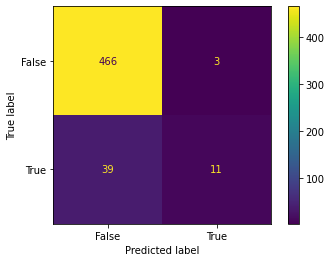

In [13]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
train = all_star_batters_min[all_star_batters_min['year_ID'] != 2022].fillna(0)
test = all_star_batters_min[all_star_batters_min['year_ID'] == 2022].fillna(0)
#all_star_batters_min['OPS'].fillna(0, inplace = True)
#all_star_batters_min['bwar162'].fillna(0, inplace = True)
#all_star_batters_min['wRC_plus'].fillna(0, inplace = True)
#all_star_batters_min['AVG_plus'].fillna(0, inplace = True)
var = ['bwar162','OPS']
var=['AVG','RBI','HR']
tar = 'AS_selection'
train_data = train[var]
test_data = test[var]
train_target = train[tar]
test_target = test[tar]
#data = data.set_index(all_star_batters_min['player_name'])
#target = all_star_batters_min['AS_selection']
train_index = train['player_name']
target_index = test['player_name']
#train_data, test_data, train_target, test_target, train_index, target_index = train_test_split(
#    data, target, index, test_size=0.3, random_state=2)
# Write your code for question 4 here
params_to_try = {'n_neighbors': range(2,30)}
knn_search = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = params_to_try,scoring = 'precision_micro')
knn_search.fit(X=train_data,y=train_target)
n = int(knn_search.best_params_.get('n_neighbors')) # int: n_neighbors
knn_model = KNeighborsClassifier(n_neighbors = n)
knn_model.fit(X=train_data,y=train_target)
predict = knn_model.predict(test_data)
predict = pd.Series(predict)
score = float(accuracy_score(test_target,predict))
predict.reset_index(drop=True,inplace=True)
test_target.reset_index(drop=True,inplace=True)
target_index.reset_index(drop=True,inplace=True)
print("Optimal n_neighors:", n)
print("Accuracy on testing data:", score)
print()
check = pd.concat([test_target,predict],axis=1,ignore_index=True)
check = check.set_index(target_index)
check.columns = ['AS_selection','AS_prediction']
check_diff = check[check['AS_selection']!=check['AS_prediction']]
pd.options.display.max_rows = 100
print(check)
print(check_diff)
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_target,knn_model.predict(test_data)),display_labels=knn_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

50


C:\Users\davis\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\davis\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\davis\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0

Optimal n_neighors: 24
Accuracy on testing data: 1.0

                  AS_selection  AS_prediction
player_name                                  
CJ Abrams                False          False
José Abreu               False          False
Ronald Acuna Jr.          True          False
Willy Adames             False          False
Riley Adams              False          False
...                        ...            ...
Christian Yelich         False          False
Juan Yepez               False          False
Seby Zavala              False          False
Bradley Zimmer           False          False
Mike Zunino              False          False

[519 rows x 2 columns]
                       AS_selection  AS_prediction
player_name                                       
Ronald Acuna Jr.               True          False
Pete Alonso                    True          False
Jose Altuve                    True          False
Tim Anderson                   True          False
Luis Arraez       

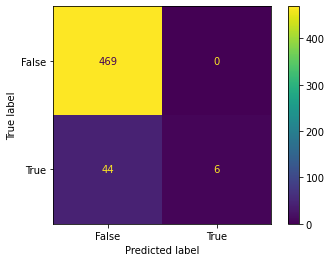

0.8700000000000006
1.0
       yearID  stint     PA     AB      H    2B   3B    HR   RBI    BB  ...  \
13     2022.0    1.0  139.0  125.0   29.0   5.0  0.0   2.0  11.0   4.0  ...   
31     2022.0    1.0  679.0  601.0  183.0  40.0  0.0  15.0  75.0  62.0  ...   
54     2022.0    1.0  533.0  467.0  124.0  24.0  0.0  15.0  50.0  53.0  ...   
64     2022.0    1.0  617.0  563.0  134.0  31.0  0.0  31.0  98.0  49.0  ...   
101    2022.0    1.0  155.0  142.0   25.0   4.0  0.0   5.0  10.0  12.0  ...   
...       ...    ...    ...    ...    ...   ...  ...   ...   ...   ...  ...   
14908  2022.0    1.0  671.0  575.0  145.0  25.0  4.0  14.0  57.0  88.0  ...   
14909  2022.0    1.0  274.0  253.0   64.0  13.0  0.0  12.0  30.0  16.0  ...   
14976  2022.0    1.0  205.0  178.0   48.0  14.0  0.0   2.0  21.0  19.0  ...   
14997  2022.0    1.0   87.0   76.0    8.0   4.0  0.0   2.0   3.0   5.0  ...   
15045  2022.0    1.0  123.0  115.0   17.0   3.0  0.0   5.0  16.0   6.0  ...   

       gms_CF  gms_RF  gms_O

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
train = all_star_batters_min[all_star_batters_min['year_ID'] != 2022].fillna(-10000)
test = all_star_batters_min[all_star_batters_min['year_ID'] == 2022].fillna(-10000)
print(len(test[test['AS_selection']==1]))
#all_star_batters_min['OPS'].fillna(0, inplace = True)
#all_star_batters_min['bwar162'].fillna(0, inplace = True)
#all_star_batters_min['wRC_plus'].fillna(0, inplace = True)
#all_star_batters_min['AVG_plus'].fillna(0, inplace = True)
var = ['H', 'HR', 'RBI', 'AVG', 'OBP', 'pos162', 'def162', 'BB_plus', 'SLG_plus',
 'wRC_plus']
var=['AVG','RBI','HR','def162','OPS']
tar = 'AS_selection'
train_data = train[var]
test_data = test[var]
train_target = train[tar]
test_target = test[tar]
#data = data.set_index(all_star_batters_min['player_name'])
#target = all_star_batters_min['AS_selection']
train_index = train['player_name']
target_index = test['player_name']

num=0
maxscore = 0
while(num<1):
    num=num+0.01
    linear_model = LogisticRegression(class_weight={0:num,1:1-num},max_iter=10000)
    linear_model.fit(X=train_data,y=train_target)
    predict = linear_model.predict(test_data)
    predict = pd.Series(predict)
    score = metrics.precision_score(test_target,predict,pos_label=1)
    if(score>maxscore):
        maxscore=score
        bnum = num
linear_model = LogisticRegression(class_weight={0:0.87,1:0.13},max_iter=10000)
linear_model.fit(X=train_data,y=train_target)
predict = linear_model.predict(test_data)
predict = pd.Series(predict)
score = float(metrics.precision_score(test_target,predict,pos_label=1))
predict.reset_index(drop=True,inplace=True)
test_target.reset_index(drop=True,inplace=True)
target_index.reset_index(drop=True,inplace=True)
print("Optimal n_neighors:", n)
print("Accuracy on testing data:", score)
print()
check = pd.concat([test_target,predict],axis=1,ignore_index=True)
check = check.set_index(target_index)
check.columns = ['AS_selection','AS_prediction']
check_diff = check[check['AS_selection']!=check['AS_prediction']]
pd.options.display.max_rows = 105
print(check)
print(check_diff)
print(check[((check['AS_selection']==check['AS_prediction'])&(check['AS_prediction']==True))])
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_target,linear_model.predict(test_data)),display_labels=linear_model.classes_)
disp.plot()
plt.grid(False)
plt.show()
print(bnum)
print(maxscore)
print(test.select_dtypes(np.number))
print(linear_model.coef_)
names = list(test_data.columns)
print(all_star_batters_min.columns)
good = np.array([])
i=0
for val in linear_model.coef_[0]:
    print(val)
    if(val>0):
        good = np.append(good,names[i])
    i=i+1;
print(good)

In [15]:
exp = all_star_batters_min[all_star_batters_min['AS_selection']==1]
print(exp[exp['OPS']<min(exp['OPS'])+10][['player_name','is_P']])

         player_name is_P
1967  Miguel Cabrera    N
9102   Yadier Molina    N


26
Optimal n_neighors: 24
Accuracy on testing data: 0.43243243243243246

                  AS_selection  AS_prediction
player_name                                  
Cory Abbott              False          False
Bryan Abreu              False          False
Domingo Acevedo          False          False
Jason Adam               False          False
Joan Adon                False          False
...                        ...            ...
Miguel Yajure            False          False
Ryan Yarbrough           False          False
Angel Zerpa              False          False
T.J. Zeuch               False          False
Bruce Zimmermann         False          False

[620 rows x 2 columns]
                  AS_selection  AS_prediction
player_name                                  
Tyler Anderson           False           True
David Bednar              True          False
Shane Bieber             False           True
Paul Blackburn            True          False
Luis Castillo             Tru

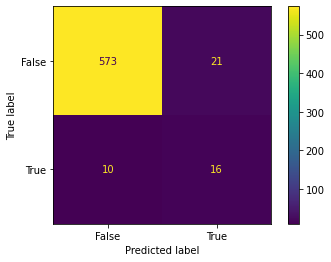

0.060000000000000005
0.5079365079365079
       yearID  stint   PA   AB    H   2B   3B   HR  RBI   BB  ...  gms_CF  \
12     2022.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
22     2022.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
40     2022.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
69     2022.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
116    2022.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
...       ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...   
14873  2022.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
14883  2022.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
14980  2022.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
14984  2022.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   
15000  2022.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   

       gms_RF  gms_OF  gms_DH  gms_

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
train = all_star_pitchers_min[all_star_pitchers_min['year_ID'] != 2022].fillna(-10000)
test = all_star_pitchers_min[all_star_pitchers_min['year_ID'] == 2022].fillna(-10000)
print(len(test[test['AS_selection']==1]))
#all_star_batters_min['OPS'].fillna(0, inplace = True)
#all_star_batters_min['bwar162'].fillna(0, inplace = True)
#all_star_batters_min['wRC_plus'].fillna(0, inplace = True)
#all_star_batters_min['AVG_plus'].fillna(0, inplace = True)
var = ['H', 'HR', 'RBI', 'AVG', 'OBP', 'pos162', 'def162', 'BB_plus', 'SLG_plus',
 'wRC_plus']
var=['pwar162','K9_plus']
tar = 'AS_selection'
train_data = train[var]
test_data = test[var]
train_target = train[tar]
test_target = test[tar]
#data = data.set_index(all_star_batters_min['player_name'])
#target = all_star_batters_min['AS_selection']
train_index = train['player_name']
target_index = test['player_name']

num=0
maxscore = 0
while(num<1):
    num=num+0.01
    linear_model = LogisticRegression(class_weight={0:num,1:1-num},max_iter=10000)
    linear_model.fit(X=train_data,y=train_target)
    predict = linear_model.predict(test_data)
    predict = pd.Series(predict)
    score = metrics.f1_score(test_target,predict,pos_label=1)
    if(score>maxscore):
        maxscore=score
        bnum = num
linear_model = LogisticRegression(class_weight={0:0.06,1:0.94},max_iter=10000)
linear_model.fit(X=train_data,y=train_target)
predict = linear_model.predict(test_data)
predict = pd.Series(predict)
score = float(metrics.precision_score(test_target,predict,pos_label=1))
predict.reset_index(drop=True,inplace=True)
test_target.reset_index(drop=True,inplace=True)
target_index.reset_index(drop=True,inplace=True)
print("Optimal n_neighors:", n)
print("Accuracy on testing data:", score)
print()
check = pd.concat([test_target,predict],axis=1,ignore_index=True)
check = check.set_index(target_index)
check.columns = ['AS_selection','AS_prediction']
check_diff = check[check['AS_selection']!=check['AS_prediction']]
pd.options.display.max_rows = 105
print(check)
print(check_diff)
print(check[((check['AS_selection']==check['AS_prediction'])&(check['AS_prediction']==True))])
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_target,linear_model.predict(test_data)),display_labels=linear_model.classes_)
disp.plot()
plt.grid(False)
plt.show()
print(bnum)
print(maxscore)
print(test.select_dtypes(np.number))
print(linear_model.coef_)
names = list(test_data.columns)
print(all_star_batters_min.columns)
good = np.array([])
i=0
for val in linear_model.coef_[0]:
    print(val)
    if(val>0):
        good = np.append(good,names[i])
    i=i+1;
print(good)